# Ирисы Фишера
Датасет описывает 150 семплов ирисов 3х сортов.
Датасет предствлен реальными ботаническими данными.

## Атрибуты
Тип всех атрибутов - числовой
- *sepal length* (длина чашелистика)
- *sepal width* (ширина чашелистника)
- *petal length* (длина лепестка)
- *petal width* (ширина лепестка)

Одной из задач анализа данного набора данных - нахождение зависимостей между в числовыми значениями длин частей околоцветника и их сорте. 

In [1]:
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
import pandas as pd
from pandas.plotting import scatter_matrix

plt.style.use('ggplot')
iris = load_iris()

In [2]:
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Проверим набор на пропущенные значения

In [3]:
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Как видим, пропущенных значений не обнаружено.

# Корреляционная матрица

In [4]:
correlation_matrix = iris_data.corr()
correlation_matrix.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


# Тепловая карта корреляционной матрицы

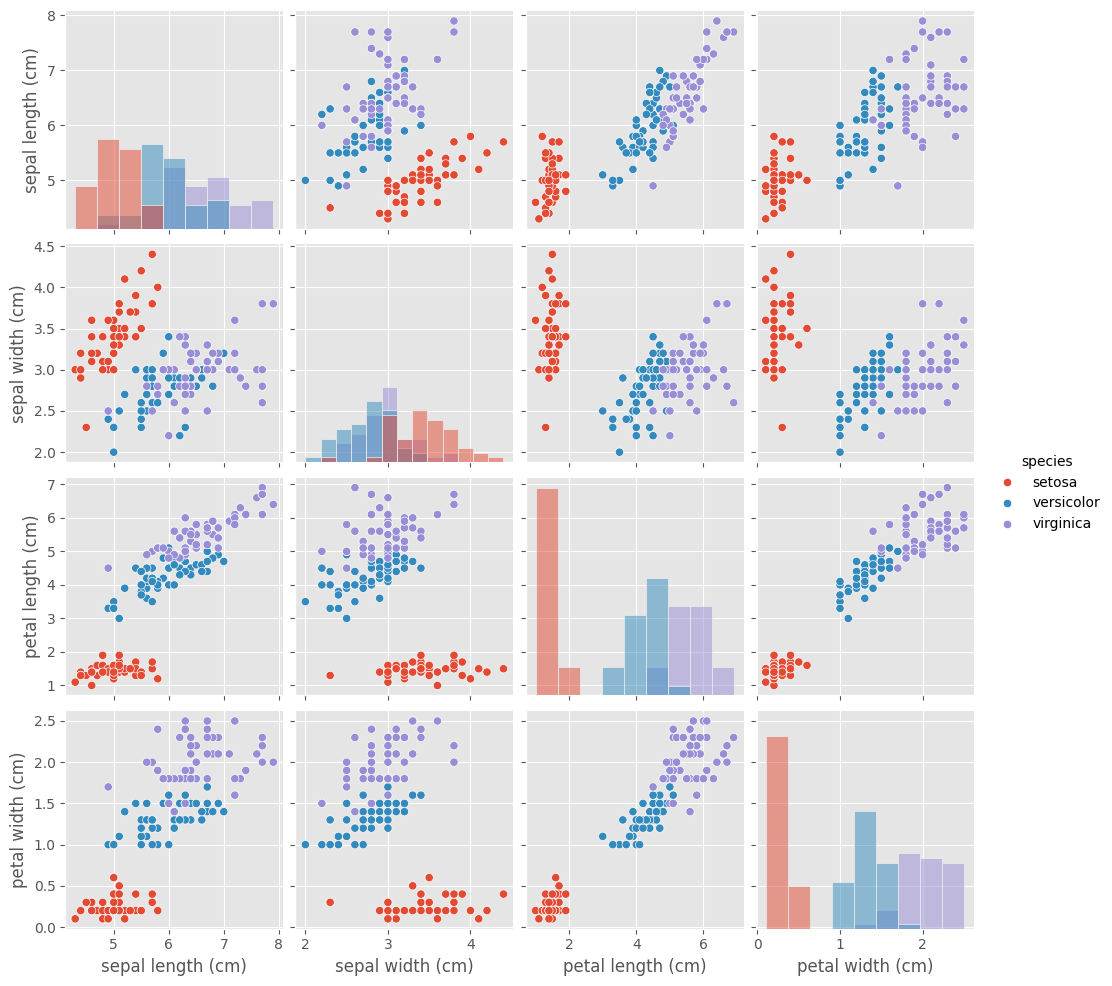

In [5]:
iris_data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
sns.pairplot(iris_data, hue="species", diag_kind="hist")

<Axes: >

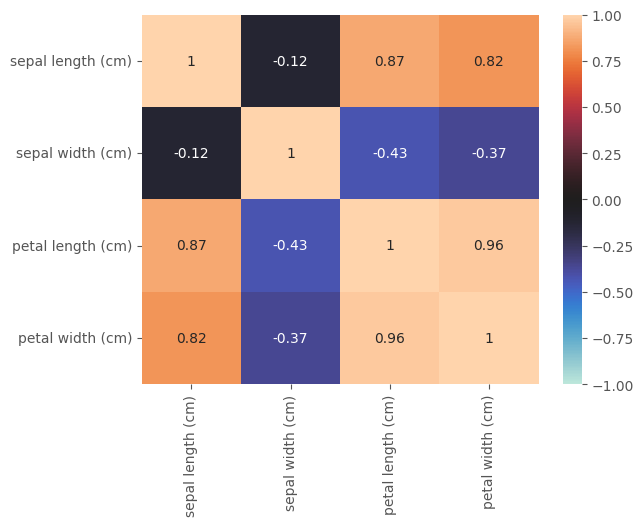

In [6]:
sns.heatmap(correlation_matrix, annot = True, vmin=-1, vmax=1, center= 0)

# Анализ кореляции
Использование тепловой карты дает наглядное понимание разброса значений кореляции.
Анализируя кореляцию признаков можно увидеть, что признаки можно разделить на три группы.
### Группы с сильной кореляцией

К группе со значительной кореляцией отнесем признаки, модуль кореляции которых лежит в следующих границах: *0.66 <= |corr| < 1*. К таким признакам относятся:

- **Прямая кореляция (corr=0.82) sepal length и petal width**. Из этого можно сделать вывод, что цветы с длинным чашелистником будут иметь широкие лепестки и наоборот.

- **Прямая кореляция (corr=0.96) petal length и petal width**. Из этого можно сделать вывод, что увеличение длины лепестков, как правило, также сопровождается увеличением их ширины, возможно это связано со природным стремлением сохранения пропорций размера цветка.

- **Прямая кореляция (corr=0.87) между sepal length и petal length**. Из этого можно сделать вывод, что растение с более длинным чашелистником будет иметь и более длинные лепестки.

- 
Делая общий вывод по этой группе признаков можно сказать о закономерностях в размерах растения, что цветы с более длинным чашелистником будут больше и по всем остальным параметрам их лепестки будут шире и длинее, однако нужно заметить, что в данной группе нет признака **ширины** чашелистника, а только его длина.

### Группы со средней кореляцией
В данную группу можно отнести  следующие пары признаков со значениями: *0.33 <= |corr| < 0.66*

- **Обратная корреляция (corr=-37) между sepal width и petal width**. Такой параметр говорит нам о том, что более широкий чашелистник влечет более узкие лепестки и наоборот, однако относительно предыдущей группы данное значение кореляции ниже, поэтому такая закономерность выражена менее явно.

- **Обратная корреляция (corr=-0.43) sepal width и petal length**. Это говорит нам о том, что более широкий чашелистник может сопровождаться более короткими лепестками.

### Группы с низким значением кореляции
Такая группа может иметь кореляцию *0.1 <= |corr| < 0.33*
В нашем случае пара **sepal length и sepal width**  имеет обратную кореляцию со значением **corr=-0.12**. Можно принять во внимание, что существует некая зависимость между длиной чашелистника и его шириной, однако она выражена в разы меньше чем похожая зависимость в лепестках.

## Отдельно выделим данные с наибольшей и наименьшей кореляцией

### Данные с наибольше корреляцией

In [7]:
iris_data = iris_data.iloc[:, :-1] # далее последний столбец данных, который является целевым значением более не используется в анализе

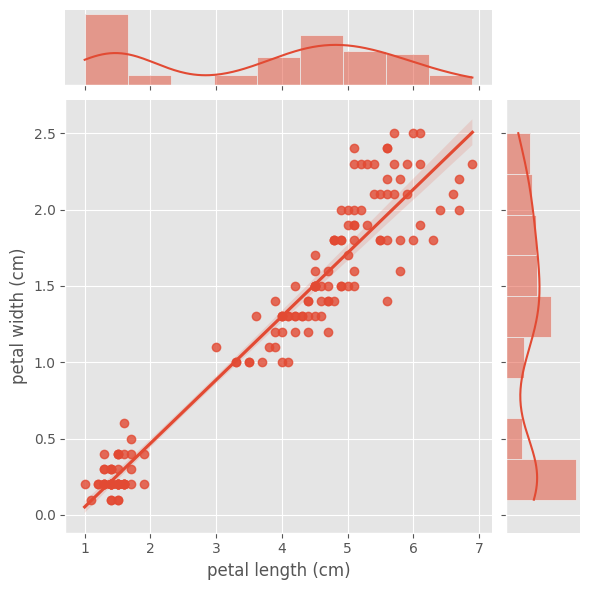

In [8]:
sns.jointplot(x="petal length (cm)", y="petal width (cm)", data=iris_data, kind="reg")

### Наменее коллериуемые данные

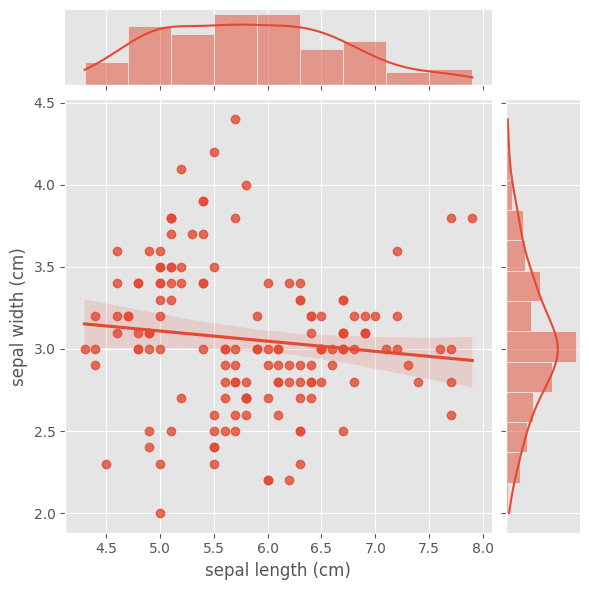

In [9]:
sns.jointplot(x="sepal length (cm)", y="sepal width (cm)", data=iris_data, kind="reg")

# Отдельные гистограммы для каждого признака

<Axes: xlabel='sepal length (cm)', ylabel='Count'>

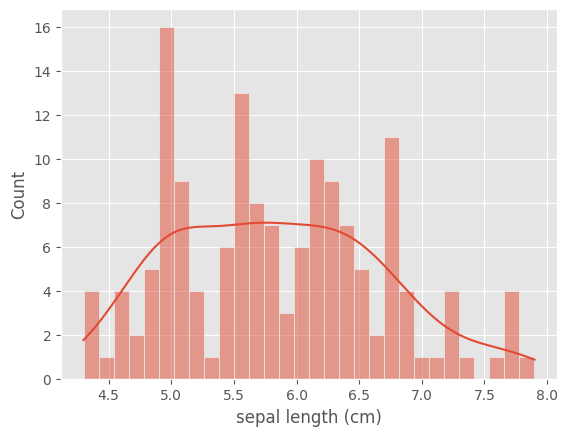

In [10]:
sns.histplot(data=iris_data, x="sepal length (cm)", bins=30, kde=True)

In [11]:
print(f"СКО {np.std(iris_data['sepal length (cm)'],ddof=1)}")
print(f"Среднее {np.mean(iris_data['sepal length (cm)'])}")

СКО 0.828066127977863
Среднее 5.843333333333334


<Axes: xlabel='sepal width (cm)', ylabel='Count'>

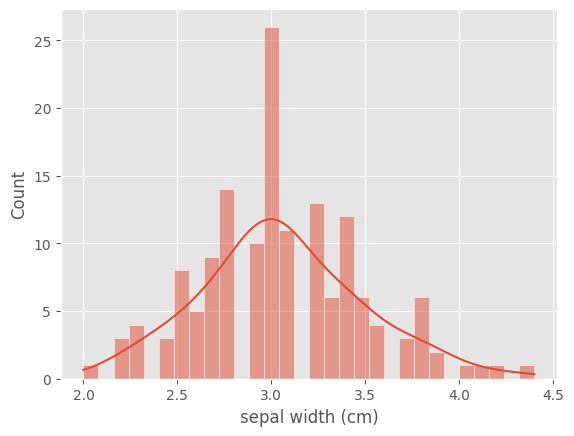

In [12]:
sns.histplot(data=iris_data, x="sepal width (cm)", bins=30, kde=True)

In [13]:
print(f"СКО {np.std(iris_data['sepal width (cm)'],ddof=1)}")
print(f"Среднее {np.mean(iris_data['sepal width (cm)'])}")

СКО 0.4358662849366982
Среднее 3.0573333333333337


<Axes: xlabel='petal length (cm)', ylabel='Count'>

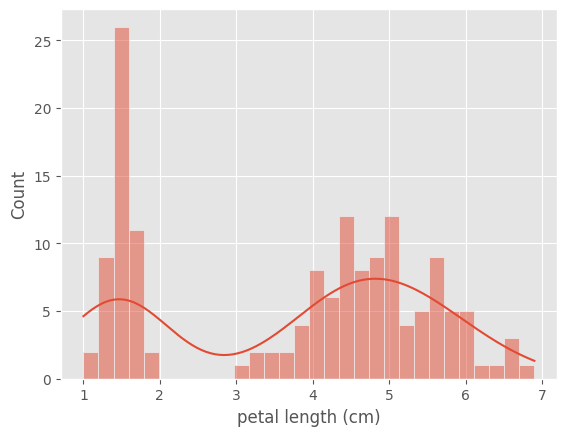

In [14]:
sns.histplot(data=iris_data, x="petal length (cm)", bins=30, kde=True)

In [15]:
print(f"СКО {np.std(iris_data['petal length (cm)'],ddof=1)}")
print(f"Среднее {np.mean(iris_data['petal length (cm)'])}")

СКО 1.7652982332594662
Среднее 3.7580000000000005


<Axes: xlabel='petal width (cm)', ylabel='Count'>

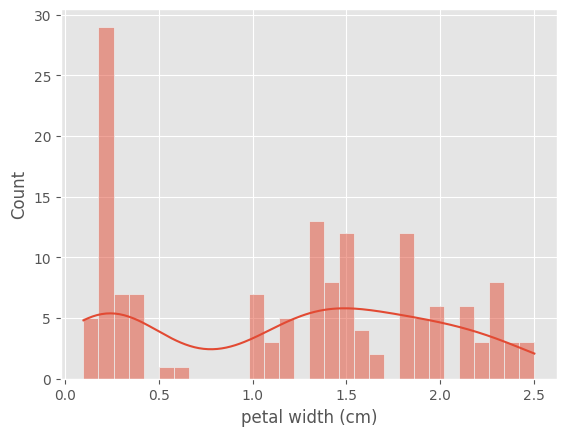

In [16]:
sns.histplot(data=iris_data, x="petal width (cm)", bins=30, kde=True)

In [17]:
print(f"СКО {np.std(iris_data['petal width (cm)'],ddof=1)}")
print(f"Среднее {np.mean(iris_data['petal width (cm)'])}")

СКО 0.7622376689603465
Среднее 1.1993333333333336


# Проверим на наличие выбросов
Визуально есть подозрительные значения, можно ли определить эти значения к выбросам? 

**Проверим выборку на выбросы, используя z_score < |3| и z_score < |2|**

## Используем z_score < |3|

In [18]:
from scipy import stats
features = [
    iris_data['sepal length (cm)'],
    iris_data['sepal width (cm)'],
    iris_data['petal length (cm)'],
    iris_data['petal width (cm)'],
]
for feature in features:
    print(f"Признак {feature.name}")
    without_outlier = feature[np.abs(stats.zscore(feature)) < 3]
    print(f"Кол-во выбросов = {len(feature) - len(without_outlier)}")
    print('\n')

Признак sepal length (cm)
Кол-во выбросов = 0


Признак sepal width (cm)
Кол-во выбросов = 1


Признак petal length (cm)
Кол-во выбросов = 0


Признак petal width (cm)
Кол-во выбросов = 0




## Используем z_score < |2|

In [19]:
for feature in features:
    print(f"Признак {feature.name}")
    without_outlier = feature[np.abs(stats.zscore(feature)) < 2]
    print(f"Кол-во выбросов = {len(feature) - len(without_outlier)}")
    print('\n')

Признак sepal length (cm)
Кол-во выбросов = 6


Признак sepal width (cm)
Кол-во выбросов = 5


Признак petal length (cm)
Кол-во выбросов = 0


Признак petal width (cm)
Кол-во выбросов = 0




Все же в датасете присутсвуют выбросы, их удалось определить при обоих значениях индекса стандартного отклонения.

# Вывод
В ходе работы был проведен первичный анализ датасета, в датасете не было обнаружено пропущенных значений, в ходе работы были построены гистограммы и диаграммы рассеивания, которые демонстрируют наличие выбросов, коих обнаружено не было (возможно из-за малого размера выборки) и кореляцию данных, также с использованием специальных библиотек были найдены основные статистические параметры датасета, например СКО, средние значения и т.д.